## 1. Drift Density Graph

1. load session logs (ORPDA) - 5 characters (Eddy Lin, John Lin, Abigail Chen, Tom Moreno, Hailey Johnson)
2. Combine to one dataframe.
3. Chart density graph using sns lineplot

In [91]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

ROOT = Path.cwd().parents[2]
print(ROOT)

LOG_DIR = ROOT / "app/logs/"
print(LOG_DIR)

/Users/jaelinlee/Documents/GitHub/A2A_chat
/Users/jaelinlee/Documents/GitHub/A2A_chat/app/logs


In [92]:
# -----------------------------------------------------
# LOAD LOGS
# -----------------------------------------------------


def load_logs(log_dir):
    rows = []
    for f in log_dir.glob("session_*.log"):
        with f.open() as fh:
            for line in fh:
                try:
                    rows.append(json.loads(line))
                except:
                    pass
    return pd.DataFrame(rows)


df = load_logs(LOG_DIR)
df

# Split ORPDA and ORPA
df_orpda = df[df["use_drift"] == True].copy()
df_orpa = df[df["use_drift"] == False].copy()
print("ORPDA: ", df_orpda.shape[0], "ORPA: ", df_orpa.shape[0], "\n")

ORPDA:  444 ORPA:  0 



In [93]:
df_orpda

,ts_created,tick,sim_time,agent,use_drift,orpda
0,2025-12-16T15:53:44.572912-05:00,0,2023-02-13 06:00,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
1,2025-12-16T15:53:48.090499-05:00,1,2023-02-13 06:15,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
2,2025-12-16T15:53:52.092509-05:00,2,2023-02-13 06:30,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
3,2025-12-16T15:53:56.074182-05:00,3,2023-02-13 06:45,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
4,2025-12-16T15:54:00.202814-05:00,4,2023-02-13 07:00,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
...,...,...,...,...,...,...
439,2025-12-16T16:57:07.951590-05:00,63,2023-02-13 21:45,Sam Moore,True,{'observation': {'datetime_start': '2023-02-13...
440,2025-12-16T16:57:12.786386-05:00,64,2023-02-13 22:00,Sam Moore,True,{'observation': {'datetime_start': '2023-02-13...
441,2025-12-16T16:57:17.714257-05:00,65,2023-02-13 22:15,Sam Moore,True,{'observation': {'datetime_start': '2023-02-13...
442,2025-12-16T16:57:22.132541-05:00,66,2023-02-13 22:30,Sam Moore,True,{'observation': {'datetime_start': '2023-02-13...


In [94]:
df_orpa

,ts_created,tick,sim_time,agent,use_drift,orpda


In [95]:
# -----------------------------------------------------
# ORPDA drift dataframe
# -----------------------------------------------------
raw_drift_df = pd.DataFrame(
    df_orpda.apply(lambda x: x["orpda"]["drift_decision"], axis=1).to_dict()
).T
merged_df = pd.merge(
    df_orpda, raw_drift_df, left_on=df_orpda.index, right_on=raw_drift_df.index
)
persona = merged_df[merged_df.agent == "Eddy Lin"]
persona.sample(3)

,key_0,ts_created,tick,sim_time,agent,use_drift,orpda,should_drift,drift_type,drift_topic,drift_action,drift_intensity,potential_recovery,justification,datetime_start,duration_min,state_summary
344,344,2025-12-16T15:43:22.912529-05:00,28,2023-02-13 13:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,attentional_leak,"Further exploration of modal interchange, spec...",continue class,0.8,Eddy's intense focus on his composition projec...,Eddy Lin is deeply engrossed in his compositio...,2023-02-13 13:00,15,NaN
352,352,2025-12-16T15:44:03.582151-05:00,36,2023-02-13 15:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,Further exploring the application of derived m...,continue,0.8,Eddy may eventually return to his original stu...,Eddy's consistent internal drift towards music...,2023-02-13 15:00,15,NaN
321,321,2025-12-16T15:41:37.513480-05:00,5,2023-02-13 07:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,The subtle harmonic progressions in the faint ...,continue sleep,0.3,"Eddy is still asleep, so internal drift is exp...",Eddy's innate musical curiosity leads him to d...,2023-02-13 07:15,15,NaN


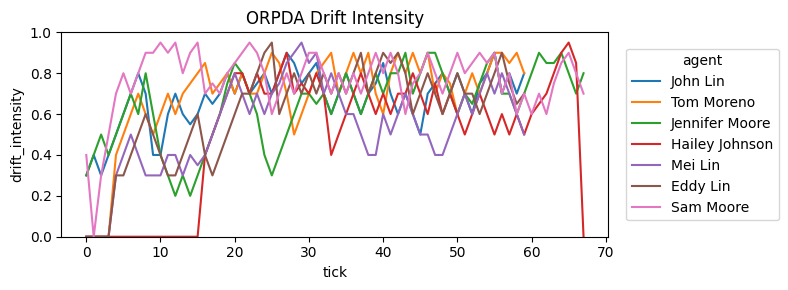

In [96]:
# -----------------------------------------------------
# Graph Drift
# -----------------------------------------------------
df = merged_df.copy()

plt.figure(figsize=(8, 3))
sns.lineplot(data=df, x="tick", y="drift_intensity", hue="agent", estimator="mean")
plt.title("ORPDA Drift Intensity")
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), title="agent")
plt.ylim(0,1)
plt.tight_layout()
plt.show()